

```

```

* Solve the classification problem using the following methods: Logistic Regression, Decision Tree, Random Forest, XGBoost, Naïve Bayes, and SVM.
* Compare the performance of each classifier.
* Visualize the decision boundary for each method.



 There is a dataset given which contains the information of various users obtained from the social networking sites. There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car.

 DataSet: Social_Network_Ads.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

dataset = pd.read_csv('/content/Social_Network_Ads.csv')

print(dataset.head())
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    return accuracy, precision, recall, f1, auc

classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}
for name, clf in classifiers.items():
    accuracy, precision, recall, f1, auc = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc
    }
results_df = pd.DataFrame(results).T
print(results_df)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression      0.86   0.925926  0.675676  0.781250  0.963106
Decision Tree            0.83   0.777778  0.756757  0.767123  0.814886
Random Forest            0.89   0.825000  0.891892  0.857143  0.957743
XGBoost                  0.89   0.825000  0.891892  0.857143  0.944659
Naïve Bayes              0.93   0.941176  0.864865  0.901408  0.987130
SVM                      0.93   0.857143  0.972973  0.911392  0.974260


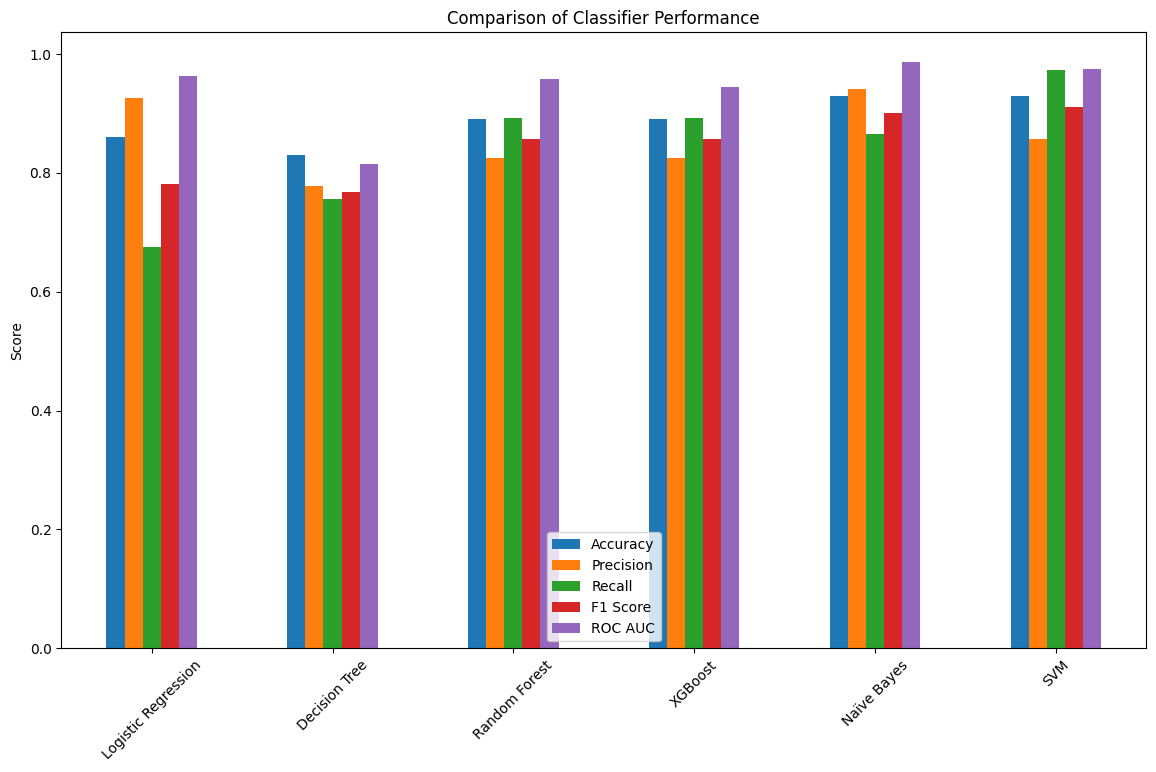

In [ ]:




results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Classifier Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

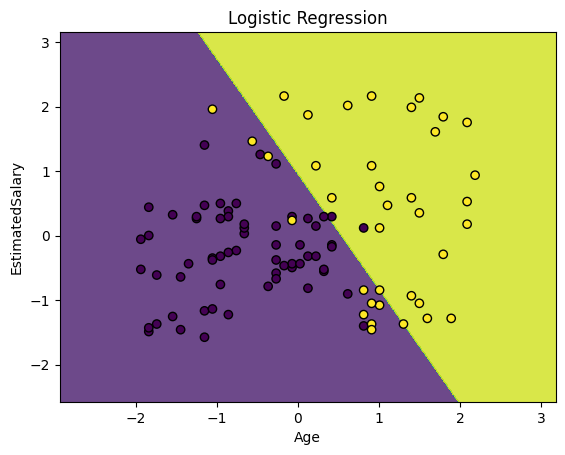

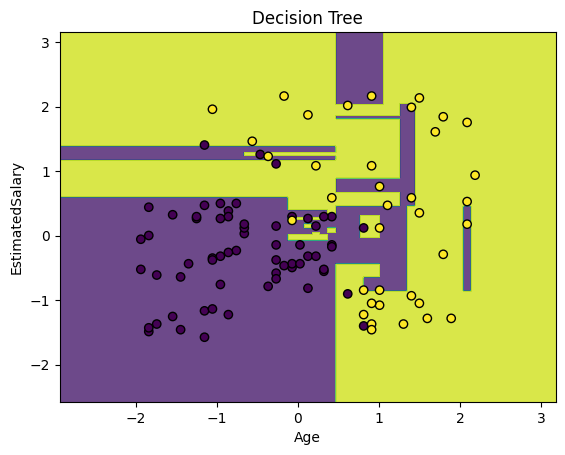

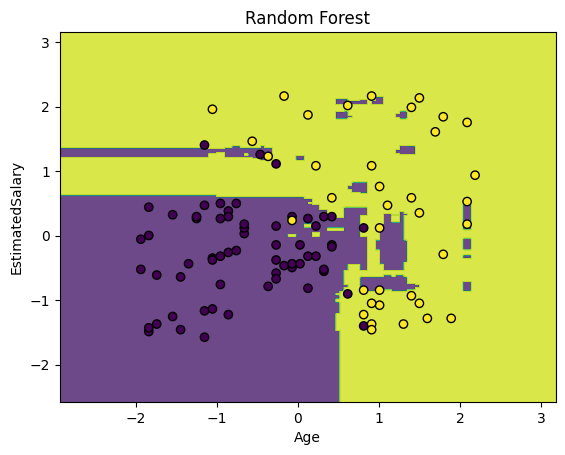

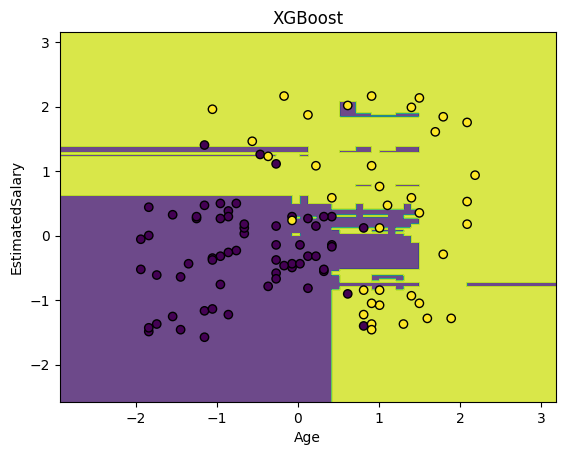

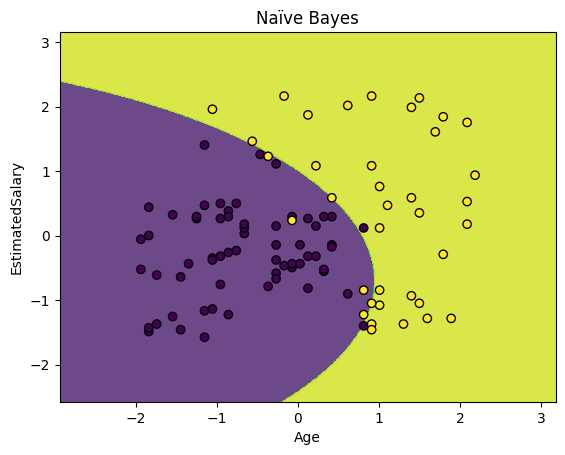

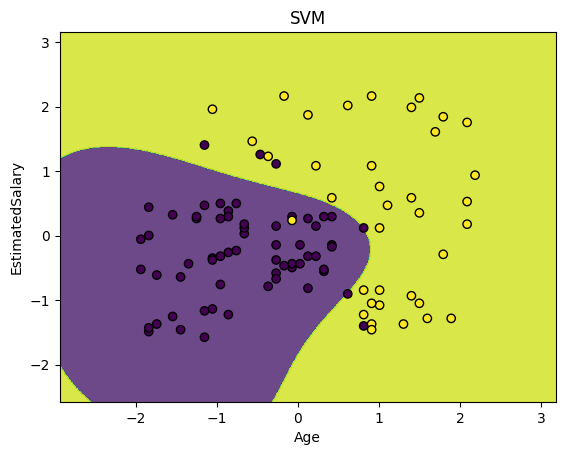

In [ ]:


def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('EstimatedSalary')
    plt.show()

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_test, y_test, name)